## ABOUT THE DATA TO BE ANALYZED

### BELLABEAT PRODUCTS AND ANALYSIS

#### Characters and products

##### Characters

- Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer  
- Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team 
- Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy. You joined this team six months ago and have been busy learning about Bellabeat’’s mission and business goals — as well as how you, as a junior data analyst, can help Bellabeat achieve them.

##### Products

- Bellabeat app: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle,    and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.  
- Leaf: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.  
- Time: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.  
- Spring: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.  
- Bellabeat membership: Bellabeat also offers a subscription-based membership program for users. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

### Key tasks

  1. Identify the business task: The business task of this analysis is to gain insight into a how consumers use non-Bellabeat smart devices and use these insights gained to influence the marketing strategy for bellabeats's products.

  2. Consider key stakeholders

  3. Key stakeholders would be the bellabeat's current and prospective female customers, and bellabeat's marketing team.   

### PREPARATION OF DATA FOR ANALYSIS

  - Data is stored as CSV file
  - Data organization is mixed where some files are in long format and others in wide format.
  - ROCCC Analysis on the data is as follows:
    1. Reliability: Data is fairly reliable as it reflects how fitness devices influence the fitness habits of some individuals. 
    2. Originality: Data originality is low has it is gathered by third party.               
    3. Comprehensive: Data comprehensiveness is low as it is mixed gender data while the target stakeholders are female.
    4. Current: Data is outdated by a few years, hence not current.
    5. Cited: Data is in a public domain and not properly cited.
  - Data is in a public domain hence available for public use.
  - Data integrity cannot be verified due to it been gathered by a third-party.
  - Data comprises of how 30 individuals use fitness devices to monitor and improve on their fitness habits
  - Exploratory data analysis was performed on the daily_activity merged file to check and correct for improper entries, errors and improper formats.
  - The total count of uniqe indviduals was performed and discovered to be 33 instead of the initial stated 30.

#### The data will be prepared based on the following hypotesis:

##### Question 1: is there inconsistency in the data tracked by the smart devices due to individuals not wearing their fitbase devices all through the day?
  1. Analysis: The average total active minutes and average total steps of each individual will be analyzed with respect to their average calories
  2. Question to be answered through analysis: Does high active minutes and more total steps taken always correlate to higher calories burned?
  3. Hypothesis: if high active minutes and high total steps taken from the fit base recorded data does not always correlate to higher calories burned, then there is loss of data due to inconsistency in the tracking of the smart devices.
   
##### Question 2: Do individuals keep track of their daily steps taken regardless of if its over a short or longer distance?
  1.  Analysis: The steps taken will be categorized into low, medium and high 
  2.  Question to be answered through analysis: is there a significant difference between recorded low, medium and high number of steps taken?
  3. Hypothesis: if there is no significant difference betwwen the low, medium and high steps taken, then individuals keep track of the number of steps they take regardless of the distance.
  
##### Question 3: what is the general usage trend of the smart devices during the days of the week?
  1.  Analysis: The average total steps and average total active minutes will be grouped by the days of the week.
  2.  Question to be answered through analysis: How does the usage of the smart devices vary by the days of the week.
  3. Hypothesis: The similarity in the trend of average total steps and average total active minutes during the days of the week signifies how individuals use their smart devices during certain days of the week.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# The data is imported from the desktop into jupyter notebook
path = "C:/Users/Skur/Desktop/Data Analyst - Scientist Career/Data Science - Analytics/Google Data Analytics Course/Case Study 1/For python/Dailiy_activity_merged_with_sleep.csv"
df = pd.read_csv(path)
df.head(5)

,Id,activitydate,totalSteps,trackerdistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,Calories,totalbedtime
0,8792009665,2016/05/4,2283,1.46,0,0,129,848,2067,463
1,8792009665,2016/05/3,2421,1.55,0,0,156,739,2297,545
2,8792009665,2016/05/2,1831,1.17,0,0,101,916,2015,423
3,8792009665,2016/05/1,1619,1.04,0,0,79,834,1962,527
4,8792009665,2016/04/30,7174,4.59,10,20,301,749,2896,360


In [4]:
import datetime as dt

#converting the activitydate column to datetime format
df["activitydate"] = pd.to_datetime(df["activitydate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    413 non-null    int64         
 1   activitydate          413 non-null    datetime64[ns]
 2   totalSteps            413 non-null    int64         
 3   trackerdistance       413 non-null    float64       
 4   veryactiveminutes     413 non-null    int64         
 5   fairlyactiveminutes   413 non-null    int64         
 6   lightlyactiveminutes  413 non-null    int64         
 7   sedentaryminutes      413 non-null    int64         
 8   Calories              413 non-null    int64         
 9   totalbedtime          413 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(8)
memory usage: 32.4 KB


In [62]:
df.describe()

,Id,totalSteps,trackerdistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,Calories,totalbedtime
count,4.130000e+02,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,5.000979e+09,8541.140436,6.033632,25.188862,18.038741,216.854722,712.169492,2397.573850,458.639225
std,2.060360e+09,4156.926990,3.047420,36.388187,22.403590,87.164687,165.957432,762.886326,127.101607
min,1.503960e+09,17.000000,0.010000,0.000000,0.000000,2.000000,0.000000,257.000000,61.000000
25%,3.977334e+09,5206.000000,3.600000,0.000000,0.000000,158.000000,631.000000,1850.000000,403.000000
50%,4.702922e+09,8925.000000,6.290000,9.000000,11.000000,208.000000,717.000000,2220.000000,463.000000
75%,6.962181e+09,11393.000000,8.020000,38.000000,27.000000,263.000000,783.000000,2926.000000,526.000000
max,8.792010e+09,22770.000000,17.540000,210.000000,143.000000,518.000000,1265.000000,4900.000000,961.000000


### PROCESSING THE DATA FOR HYPOTHESIS 1

In [5]:
#The total active minutes for each activity date is calculated.
df["total_active_minutes"] = df["veryactiveminutes"] + df["fairlyactiveminutes"] + df["lightlyactiveminutes"]
# The data is grouped by the customer Id.
# The average of total steps, total_active_minutes and calories burnt is  calculated for each customer Id
df_group = df[["Id", "totalSteps", "total_active_minutes", "Calories"]]
df_groupby_Id = df_group.groupby(["Id"], as_index=False, sort=False)[["totalSteps", "total_active_minutes", "Calories"]].mean().round()
#Checking a sample of the data
df_groupby_Id.head(5)

,Id,totalSteps,total_active_minutes,Calories
0,8792009665,3443.0,178.0,2299.0
1,8378563200,8833.0,227.0,3454.0
2,8053475328,19079.0,301.0,3309.0
3,7086361926,10290.0,234.0,2658.0
4,7007744171,5116.0,220.0,2150.0


### PROCESSING THE DATA FOR HYPOTHESIS 2

In [6]:
#The totalsteps column is grouped into low, medium and high category
bins = np.linspace(min(df["totalSteps"]), max(df["totalSteps"]), 4)
group_names = ["Low", "Medium", "High"]
df["total_steps_category"] = pd.cut(df["totalSteps"], bins, labels=group_names, include_lowest=True)

#The total_active_minutes column is grouped into low, medium and high category
bins = np.linspace(min(df["total_active_minutes"]), max(df["total_active_minutes"]), 4)
group_names_minutes = ["Low", "Medium", "High"]
df["total_active_minutes_category"] = pd.cut(df["total_active_minutes"], bins, labels=group_names_minutes, include_lowest=True)

#Checking a sample of the data
df.head(5)

,Id,activitydate,totalSteps,trackerdistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,Calories,totalbedtime,total_active_minutes,total_steps_category,total_active_minutes_category
0,8792009665,2016-05-04,2283,1.46,0,0,129,848,2067,463,129,Low,Low
1,8792009665,2016-05-03,2421,1.55,0,0,156,739,2297,545,156,Low,Low
2,8792009665,2016-05-02,1831,1.17,0,0,101,916,2015,423,101,Low,Low
3,8792009665,2016-05-01,1619,1.04,0,0,79,834,1962,527,79,Low,Low
4,8792009665,2016-04-30,7174,4.59,10,20,301,749,2896,360,331,Low,Medium


### PROCESSING THE DATA FOR HYPOTHESIS 3

In [12]:
#The activty date are converted to their respective days of the week
df["day_of_week"] = df["activitydate"].dt.day_name()
#The data is grouped by the respective days 
#The average values for total steps taken and total active minutes is derived for each day of the week
df_group = df[["day_of_week","totalSteps", "total_active_minutes"]]
df_groupby_day = df_group.groupby(["day_of_week"], as_index=False, sort=False)[["totalSteps", "total_active_minutes"]].mean().round()
#The data is sorted by the total steps taken in ascending order.
df_groupby_day = df_groupby_day.sort_values(by = ["totalSteps"])
#Displaying the data
df_groupby_day

,day_of_week,totalSteps,total_active_minutes
3,Sunday,7298.0,239.0
5,Friday,7901.0,258.0
0,Wednesday,8023.0,246.0
6,Thursday,8205.0,242.0
1,Tuesday,9183.0,267.0
2,Monday,9340.0,272.0
4,Saturday,9949.0,300.0


### DATA ANALYSIS ON THE DATASETS BASED ON THE GIVEN HYPOTHESIS

### ANALYSIS FOR HYPOTHESIS 1

<Axes: title={'center': 'total_active_minutes versus calories burned'}, xlabel='Calories', ylabel='total_active_minutes'>

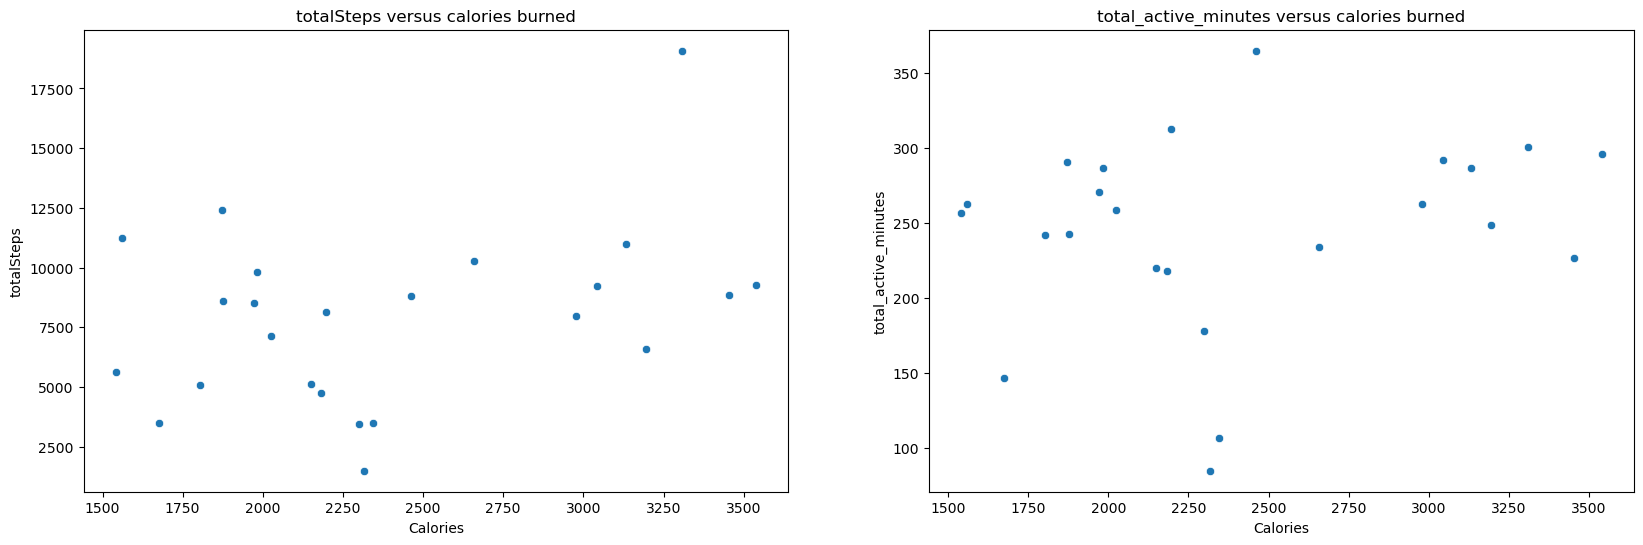

In [13]:
#using scatterplot to plot totalsteps and total_active_minutes against Calories6
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,6))

ax1.set_title('totalSteps versus calories burned')
sns.scatterplot(x='Calories', y='totalSteps', data=df_groupby_Id, ax=ax1)

ax2.set_title('total_active_minutes versus calories burned')
sns.scatterplot(x='Calories', y='total_active_minutes', data=df_groupby_Id, ax=ax2)

In the above result, there is no correlation between the average total steps, average active minutes and calroies burned. This is likely to be a result of inconsistency in the data recorded which might be as a result of data loss when users do not use their smart devices.

### ANALYSIS FOR HYPOTHESIS 2

<Axes: title={'center': 'total_active_minutes_category versus total_active_minutes'}, xlabel='total_active_minutes', ylabel='total_active_minutes_category'>

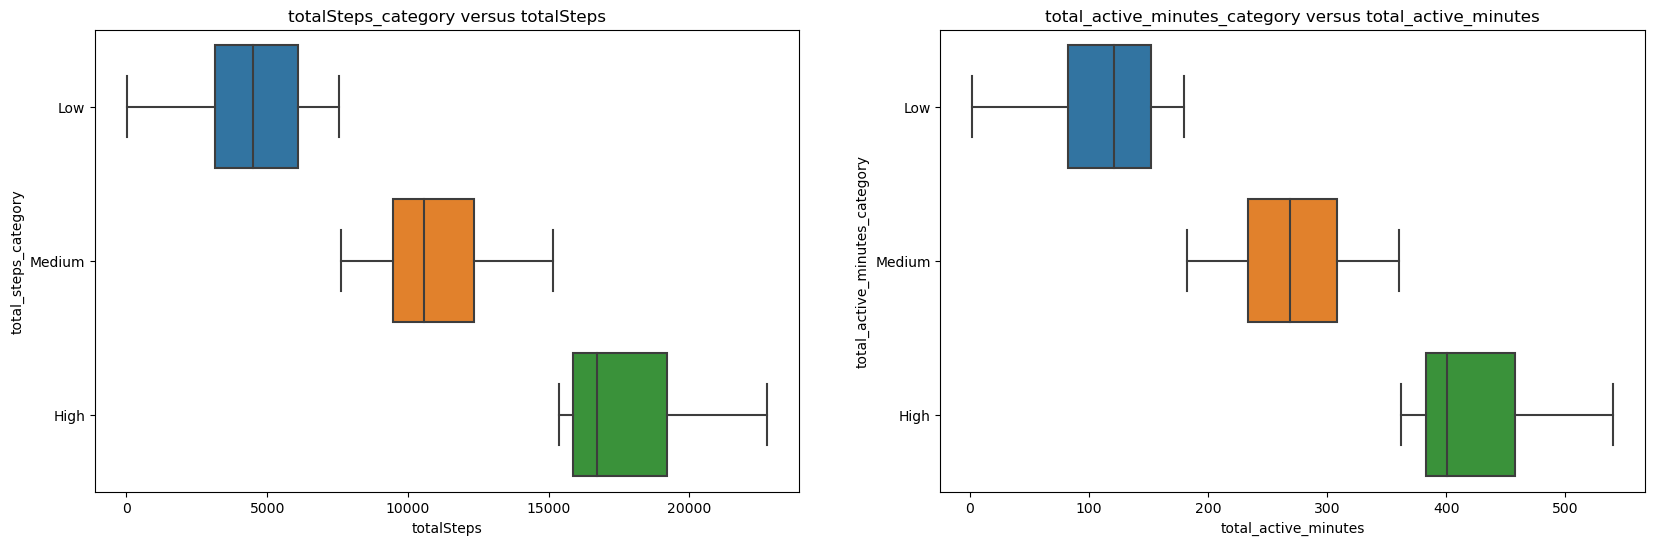

In [12]:
#box-plot for the total_steps_category using seaborn library

#using scatterplot to plot totalsteps and total_active_minutes against Calories6
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,6))

ax1.set_title('totalSteps_category versus totalSteps')
sns.boxplot(x=df["totalSteps"],  y = df["total_steps_category"], data=df, ax=ax1)

ax2.set_title('total_active_minutes_category versus total_active_minutes')
sns.boxplot(x=df["total_active_minutes"], y = df["total_active_minutes_category"], data=df, ax=ax2)

#sns.boxplot(x = df["total_active_minutes"], y = df["total_active_minutes_category"])

1. The average total steps recorded data mostly falls above the 3rd quartile of the high category while there is no significant difference in the recorded data that falls in low and medium category. Hence, it is more likely that smart device users make conscious effort to make records of their longer walks.  


2. The recorded data for average total_active_minutes mostly falls below the 1st quartile of the low category and above the 3rd quartile of the high category while there is no significant change in the movement of recorded data across the quartiles in the medium category. Hence we can deduce that, users of smart devices might be making more conscious effort to keep track of their period of low and high activeness. 

### ANALYSIS FOR HYPOTHESIS 3

<Axes: title={'center': 'avg_total_active_minutes on each day of the week'}, xlabel='day_of_week', ylabel='total_active_minutes'>

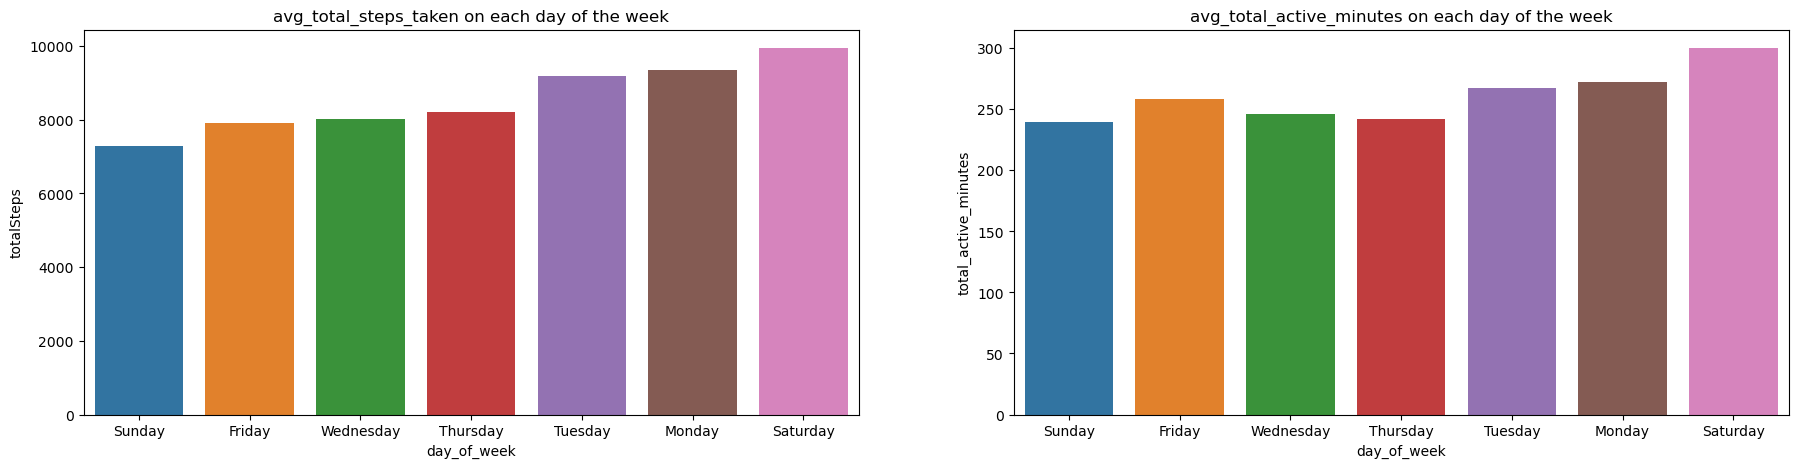

In [37]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(22,5))

ax1.set_title('avg_total_steps_taken on each day of the week')
sns.barplot(x='day_of_week', y='totalSteps', data=df_groupby_day, ax=ax1)

ax2.set_title('avg_total_active_minutes on each day of the week')
sns.barplot(x='day_of_week', y='total_active_minutes', data=df_groupby_day, ax=ax2)

There is similar trend in the usage of smart devices across the days of the week on both graphs with only friday being the major difference. It can be seen from the two graphs that:

1. Sunday has the lowest recorded data for both graphs hence users likely use their smart devices the least during this day
2. Friday is differenct for both graphs but higher than sundays. This shows users are likely to use their smart devices more on fridays than sundays.
3. Wednesday and Thursday share similar level on both graphs. The usage of smart devices by users is higher in these days than on sunday.
4. Tuesday and Monday are higher than the rest of the days except for Saturday hence usage of smart devices is high on Tuesday and Monday has compared to most days of the week.
5. With Saturdays having the highest usage of smart devices on both graphs, this signifies users are more likely to use their smart devices more engagingly on a Saturday.

### RECOMMENDATION

1. Users with non-bellabeat devices are likely not being provided with enough information on their current habits and health decisions by their smart devices. The bellabeat app can help bridge this gap.

2.  The bellabeat leaf and time devices which can be comfortably worn can provide users with 24/ 7 tracking of their low, medium and highly active periods in order to easily track their daily health habits.

3. Users might not be satisfied with their smart device usage due to inconsistency in lifestyle and health habits due to different commitmenmts during the days of the week. Bellabeat membership which provides users with a 24/ 7 personalized guidance which can help users stay on top of their lifestyle and health goals.